In [2]:
# -*- coding: utf-8 -*-
"""
Created on Sun Jun  7 10:35:02 2020
https://blog.csdn.net/a529975125/java/article/details/81176029
@author: ASUS
"""

'\nCreated on Sun Jun  7 10:35:02 2020\nhttps://blog.csdn.net/a529975125/java/article/details/81176029\n@author: ASUS\n'

<img src="Jupyter/mmd.jpg">

In [8]:
import torch
# In[1]

def guassian_kernel(source, target, kernel_mul=2.0, kernel_num=5, fix_sigma=None):
    '''
    Params: 
	    source: source n * len(x)
	    target: m * len(y)
	    kernel_mul: 
	    kernel_num: number of kernel function
	    fix_sigma: sigma value of different kernels
	Return:
		sum(kernel_val): sum of multi-kernel
    '''
    n_samples = int(source.size()[0])+int(target.size()[0])# derive column no. of matrix 
    total = torch.cat([source, target], dim=0) # merge source and target
    # duplicate total（n+m）copies
    total0 = total.unsqueeze(0).expand(int(total.size(0)), int(total.size(0)), int(total.size(1)))
    
    # exptend each column of total with (n+m) copies
    total1 = total.unsqueeze(1).expand(int(total.size(0)), int(total.size(0)), int(total.size(1)))
    
    # derive sum of the two totals, （i,j）of total represents its l2 distance
    L2_distance = ((total0-total1)**2).sum(2) 
    
    # modify sigma value of kernel
    if fix_sigma:
        bandwidth = fix_sigma
    else:
        bandwidth = torch.sum(L2_distance.data) / (n_samples**2-n_samples)
        
    # average intervals are the default values
    bandwidth /= kernel_mul ** (kernel_num // 2)
    bandwidth_list = [bandwidth * (kernel_mul**i) for i in range(kernel_num)]
    
    # Guassian kernel 
    kernel_val = [torch.exp(-L2_distance / bandwidth_temp) for bandwidth_temp in bandwidth_list]
    
    return sum(kernel_val)#/len(kernel_val)

In [9]:
def mmd_rbf(source, target, kernel_mul=2.0, kernel_num=5, fix_sigma=None):
    '''
    Calculate the MMD between source and target domains
    Params: 
	    source: source data (n * len(x))
	    target: target data（m * len(y))
	    kernel_mul: 
	    kernel_num: number of kernels
	    fix_sigma: sigma values of kernels
	Return:
		loss: MMD loss
    '''
    batch_size = int(source.size()[0]) # the same batch sizes of source and target as default
    kernels = guassian_kernel(source, target,
        kernel_mul=kernel_mul, kernel_num=kernel_num, fix_sigma=fix_sigma)
    
    # diveide matrix into 4 parts
    XX = kernels[:batch_size, :batch_size]
    YY = kernels[batch_size:, batch_size:]
    XY = kernels[:batch_size, batch_size:]
    YX = kernels[batch_size:, :batch_size]
    loss = torch.mean(XX + YY - XY -YX)
    
    return loss #assume n==m

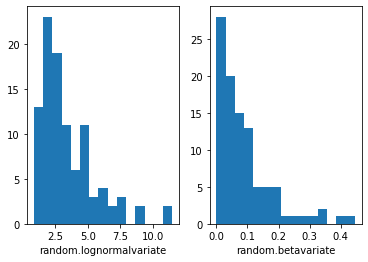

In [10]:
# In[2]
import random
import matplotlib.pyplot as plt

SAMPLE_SIZE = 100
buckets = 15

# lognormal distribution 
plt.subplot(1,2,1)
plt.xlabel("random.lognormalvariate")
mu = 1
sigma = 0.6
res1 = [random.lognormvariate(mu, sigma) for _ in range(1, SAMPLE_SIZE)]
#res1 = [random.normalvariate(mu, sigma) for _ in range(1, SAMPLE_SIZE)]
plt.hist(res1, buckets)

# Beta Distribution with parameters alpha and beta > 0
plt.subplot(1,2,2)
plt.xlabel("random.betavariate")
alpha = 1
beta = 10
res2 = [random.betavariate(alpha, beta) for _ in range(1, SAMPLE_SIZE)]
plt.hist(res2, buckets)

plt.savefig('data.jpg')
plt.show()

In [12]:
# In[]
from torch.autograd import Variable

diff_1 = []
for i in range(10):
    #diff_1.append([random.lognormvariate(mu, sigma) for _ in range(1, SAMPLE_SIZE)])
    diff_1.append([random.normalvariate(1, 0.6) for _ in range(1, SAMPLE_SIZE)])

diff_2 = []
for i in range(10):
    #diff_2.append([random.lognormvariate(mu, sigma) for _ in range(1, SAMPLE_SIZE)])
    #diff_2.append([random.betavariate(alpha, beta) for _ in range(1, SAMPLE_SIZE)])
    diff_2.append([random.normalvariate(-0.5, 0.8) for _ in range(1, SAMPLE_SIZE)])
    
X = torch.Tensor(diff_1)
Y = torch.Tensor(diff_2)
X,Y = Variable(X), Variable(Y)
print (mmd_rbf(X,Y))

tensor(3.3911)
